In [1]:
import sympy as sp
import numpy as np


# Define symbolic variables for angles and dimensions
theta_1, theta_2, theta_3, theta_4, theta_5 = sp.symbols(
    "theta_1 theta_2 theta_3 theta_4 theta_5"
)
d_1 = sp.symbols("d_1")
d_2=sp.symbols("d_2")
a_2, a_3, a_4, a_5 = sp.symbols("a_2 a_3 a_4 a_5")
alpha = [
    90,
    0,
    0,
    90,
    0,
]  # alpha values in degrees converted to radians within the matrix


# Helper function to create a transformation matrix from DH parameters
def dh_matrix(theta, d, a, alpha):
    alpha_rad = sp.rad(alpha)  # Convert alpha to radians
    return sp.Matrix(
        [
            [
                sp.cos(theta),
                -sp.sin(theta) * sp.cos(alpha_rad),
                sp.sin(theta) * sp.sin(alpha_rad),
                a * sp.cos(theta),
            ],
            [
                sp.sin(theta),
                sp.cos(theta) * sp.cos(alpha_rad),
                -sp.cos(theta) * sp.sin(alpha_rad),
                a * sp.sin(theta),
            ],
            [0, sp.sin(alpha_rad), sp.cos(alpha_rad), d],
            [0, 0, 0, 1],
        ]
    )


# Define the transformation matrices for each joint
A1 = dh_matrix(theta_1, d_1, 0, 90)
A2 = dh_matrix(theta_2, 0, a_2, 0)
A3 = dh_matrix(theta_3, 0, a_3, 0)
A4 = dh_matrix(theta_4, 0, 0, 90)
A5 = dh_matrix(theta_5, d_2, 0, 0)

# Compute the overall transformation matrix by multiplying individual matrices
T = A1 * A2 * A3 * A4 * A5

# Display the resulting transformation matrix
sp.init_printing(use_unicode=True)
# print("Transformation matrix:")
print(T)


Matrix([[((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_4))*cos(theta_5) + sin(theta_1)*sin(theta_5), -((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*cos(theta_4) + (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*sin(theta_4))*sin(theta_5) + sin(theta_1)*cos(theta_5), (-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*cos(theta_4), a_2*cos(theta_1)*cos(theta_2) - a_3*sin(theta_2)*sin(theta_3)*cos(theta_1) + a_3*cos(theta_1)*cos(theta_2)*cos(theta_3) + d_2*((-sin(theta_2)*sin(theta_3)*cos(theta_1) + cos(theta_1)*cos(theta_2)*cos(theta_3))*sin(theta_4) - (-sin(theta_2)*cos(theta_1)*cos(theta_3) - sin(theta_3)*cos(theta_1)*cos(theta_2))*cos(theta_4

In [22]:

def DH_matrix(theta, d, a, alpha):
    """Creates the transformation matrix using Denavit-Hartenberg parameters."""
    # Convert angles from degrees to radians
    theta_rad = np.radians(theta)
    alpha_rad = np.radians(alpha)
    return np.array(
        [
            [
                np.cos(theta_rad),
                -np.sin(theta_rad) * np.cos(alpha_rad),
                np.sin(theta_rad) * np.sin(alpha_rad),
                a * np.cos(theta_rad),
            ],
            [
                np.sin(theta_rad),
                np.cos(theta_rad) * np.cos(alpha_rad),
                -np.cos(theta_rad) * np.sin(alpha_rad),
                a * np.sin(theta_rad),
            ],
            [0, np.sin(alpha_rad), np.cos(alpha_rad), d],
            [0, 0, 0, 1],
        ]
    )


# Joint angles in degrees
theta_degrees = [0, 0, 0, 0, 0]

# DH Parameters: theta (degrees), d, a, alpha (degrees)
dh_parameters = [
    {"theta": theta_degrees[0], "d": "d1", "a": 0, "alpha": 90},  # Joint 1
    {"theta": theta_degrees[1], "d": 0, "a": "a2", "alpha": 0},  # Joint 2
    {"theta": theta_degrees[2], "d": 0, "a": "a3", "alpha": 0},  # Joint 3
    {"theta": theta_degrees[3], "d": 0, "a": "a4", "alpha": 90},  # Joint 4
    {"theta": theta_degrees[4], "d": "d2", "a": 0, "alpha": 0},  # Joint 5
]

# Define actual values for d1, a2, a3, a4, a5 if known, or use placeholders
d1 = 0.1  # Example value for d1
d2= 0.2
a2 = a3 = a4 = 0.3  # Example values for ai
a5 = 0  # Example value for a5


# Compute individual transformation matrices with joint angles
T = np.eye(4)  # Initialize T as an identity matrix for the base
for params in dh_parameters:
    # Replace strings in parameters with actual values
    d = eval(params["d"]) if isinstance(params["d"], str) else params["d"]
    a = eval(params["a"]) if isinstance(params["a"], str) else params["a"]
    T = T @ DH_matrix(params["theta"], d, a, params["alpha"])

# Extracting the position and orientation from the transformation matrix
x, y, z = T[0, 3], T[1, 3], T[2, 3]
orientation = T[:3, :3]

# Display results
print("Position of the End Effector (x, y, z):")
print(f"x = {x}")
print(f"y = {y}")
print(f"z = {z}\n")

print("Orientation Matrix of the End Effector:")
print(orientation)
print("\n")

# Optional: Print the entire transformation matrix for clarity
print("Numerical Evaluation of the Transformation Matrix:")
print(T)


Position of the End Effector (x, y, z):
x = 0.8999999999999999
y = -2.4492935982947065e-17
z = -0.1

Orientation Matrix of the End Effector:
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00]]


Numerical Evaluation of the Transformation Matrix:
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  9.0000000e-01]
 [ 0.0000000e+00 -1.0000000e+00 -1.2246468e-16 -2.4492936e-17]
 [ 0.0000000e+00  1.2246468e-16 -1.0000000e+00 -1.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]


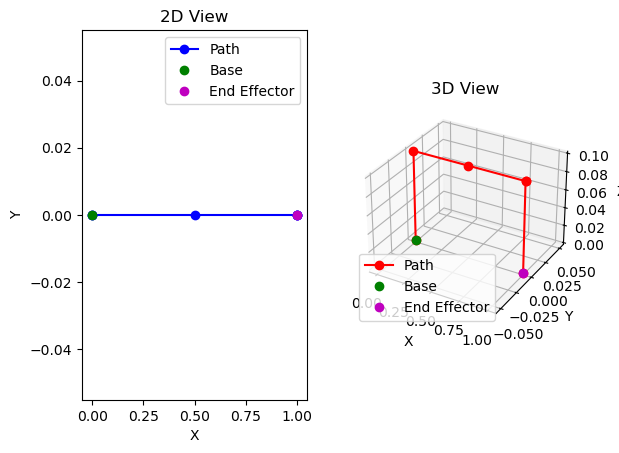

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.1, 0, pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, pi / 2
d5, a5, alpha5 = 0.1, 0, 0


# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix(
        [
            [
                cos(theta),
                -sin(theta) * cos(alpha),
                sin(theta) * sin(alpha),
                a * cos(theta),
            ],
            [
                sin(theta),
                cos(theta) * cos(alpha),
                -cos(theta) * sin(alpha),
                a * sin(theta),
            ],
            [0, sin(alpha), cos(alpha), d],
            [0, 0, 0, 1],
        ]
    )


# Define joint angles in radians
angles = {theta1: 0, theta2: 0, theta3: 0, theta4: 0, theta5: 0}

# Compute transformation matrices
T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)

# Calculate cumulative transformations
T01 = T1
T02 = T01 * T2
T03 = T02 * T3
T04 = T03 * T4
T05 = T04 * T5

# Extract positions
positions = [
    Matrix([0, 0, 0, 1]),  # Base
    T01[:3, 3],
    T02[:3, 3],
    T03[:3, 3],
    T04[:3, 3],
    T05[:3, 3],  # End effector
]
positions = [N(p) for p in positions]  # Evaluate numerically

# Plotting
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# 2D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
ax1.plot(x_vals, y_vals, "bo-")
ax1.plot(x_vals[0], y_vals[0], "go")  # Base in green
ax1.plot(x_vals[-1], y_vals[-1], "mo")  # End effector in magenta
ax1.set_title("2D View")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.legend(["Path", "Base", "End Effector"])

# 3D plot
x_vals = [p[0] for p in positions]
y_vals = [p[1] for p in positions]
z_vals = [p[2] for p in positions]
ax2.plot(x_vals, y_vals, z_vals, "ro-")
ax2.plot(x_vals[0], y_vals[0], z_vals[0], "go")  # Base in green
ax2.plot(x_vals[-1], y_vals[-1], z_vals[-1], "mo")  # End effector in magenta
ax2.set_title("3D View")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.legend(["Path", "Base", "End Effector"])

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N
import ipywidgets as widgets
from IPython.display import display

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")
# DH Parameters
d1, a1, alpha1 = 0.1, 0, 90  # Joint 1 rotates about z-axis
d2, a2, alpha2 = 0, 0.3, 0  # Joint 2 shifts axis to y, hence 90-degree shift
d3, a3, alpha3 = 0, 0.3, 0  # Following joints rotate around y-axis, no alpha shift
d4, a4, alpha4 = 0, 0.3, 0
d5, a5, alpha5 = (
    0,
    0.1,
    0,
)  # Note: This should be the link before the end, if any confusion clarify

# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix([
        [cos(theta), -sin(theta) * cos(alpha), sin(theta) * sin(alpha), a * cos(theta)],
        [sin(theta), cos(theta) * cos(alpha), -cos(theta) * sin(alpha), a * sin(theta)],
        [0, sin(alpha), cos(alpha), d],
        [0, 0, 0, 1],
    ])

def update_plot(theta1_val, theta2_val, theta3_val, theta4_val, theta5_val):
    angles = {theta1: theta1_val, theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, theta5: theta5_val}
    T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
    T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
    T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
    T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
    T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)

    # Cumulative transformations
    T01 = T1
    T02 = T01 * T2
    T03 = T02 * T3
    T04 = T03 * T4
    T05 = T04 * T5

    # Extract positions
    positions = [Matrix([0, 0, 0, 1]), T01[:3, 3], T02[:3, 3], T03[:3, 3], T04[:3, 3], T05[:3, 3]]
    positions = [N(p) for p in positions]  # Numeric evaluation

    # Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    x_vals = [p[0] for p in positions]
    y_vals = [p[1] for p in positions]
    z_vals = [p[2] for p in positions]

    ax.plot(x_vals, y_vals, z_vals, "ro-")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Robot Arm Configuration")
    plt.show()

# Sliders with joint limits for theta2 to theta5 set from -pi/2 to pi/2
theta1_slider = widgets.FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=-np.pi)
theta2_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta3_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta4_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)
theta5_slider = widgets.FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.1, value=-np.pi/6)

ui = widgets.VBox([
    theta1_slider, theta2_slider, theta3_slider, theta4_slider, theta5_slider
])
out = widgets.interactive_output(update_plot, {
    'theta1_val': theta1_slider, 
    'theta2_val': theta2_slider, 
    'theta3_val': theta3_slider, 
    'theta4_val': theta4_slider, 
    'theta5_val': theta5_slider
})

display(ui, out)


Output()

### New Robot

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, cos, sin, pi, Matrix, N
from ipywidgets import interact, FloatSlider

# Define symbolic variables
theta1, theta2, theta3, theta4, theta5 = symbols("theta1 theta2 theta3 theta4 theta5")

# DH Parameters
d1, a1, alpha1 = 0.1, 0, pi / 2
d2, a2, alpha2 = 0, 0.5, 0
d3, a3, alpha3 = 0, 0.5, 0
d4, a4, alpha4 = 0, 0, -pi / 2
d5, a5, alpha5 = 0.1, 0, 0
l6 = 0.2  # Length of the new link

# Define the transformation matrix function using DH parameters
def DH_matrix(theta, d, a, alpha):
    return Matrix([
        [cos(theta), -sin(theta) * cos(alpha), sin(theta) * sin(alpha), a * cos(theta)],
        [sin(theta), cos(theta) * cos(alpha), -cos(theta) * sin(alpha), a * sin(theta)],
        [0, sin(alpha), cos(alpha), d],
        [0, 0, 0, 1]
    ])

def plot_robot(theta1_val, theta2_val, theta3_val, theta4_val, theta5_val):
    angles = {theta1: theta1_val, theta2: theta2_val, theta3: theta3_val, theta4: theta4_val, theta5: theta5_val}
    
    # Compute transformation matrices
    T1 = DH_matrix(theta1, d1, a1, alpha1).subs(angles)
    T2 = DH_matrix(theta2, d2, a2, alpha2).subs(angles)
    T3 = DH_matrix(theta3, d3, a3, alpha3).subs(angles)
    T4 = DH_matrix(theta4, d4, a4, alpha4).subs(angles)
    T5 = DH_matrix(theta5, d5, a5, alpha5).subs(angles)
    T6 = Matrix([[1, 0, 0, l6], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

    # Calculate cumulative transformations
    T01 = T1
    T02 = T01 * T2
    T03 = T02 * T3
    T04 = T03 * T4
    T05 = T04 * T5
    T06 = T05 * T6

    # Extract positions
    positions = [Matrix([0, 0, 0, 1]), T01[:3, 3], T02[:3, 3], T03[:3, 3], T04[:3, 3], T05[:3, 3], T06[:3, 3]]
    positions = [N(p) for p in positions]  # Evaluate numerically

    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    # 2D plot
    x_vals = [p[0] for p in positions]
    y_vals = [p[1] for p in positions]
    ax1.plot(x_vals, y_vals, "bo-")
    ax1.plot(x_vals[0], y_vals[0], "go")  # Base in green
    ax1.plot(x_vals[-1], y_vals[-1], "mo")  # Extended end in magenta
    ax1.set_title("2D View")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.legend(["Path", "Base", "Extended End"])

    # 3D plot
    z_vals = [p[2] for p in positions]
    ax2.plot(x_vals, y_vals, z_vals, "ro-")
    ax2.plot(x_vals[0], y_vals[0], z_vals[0], "go")  # Base in green
    ax2.plot(x_vals[-1], y_vals[-1], z_vals[-1], "mo")  # Extended end in magenta
    ax2.set_title("3D View")
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.set_zlabel("Z")
    ax2.legend(["Path", "Base", "Extended End"])
    plt.show()

# Sliders
theta1_slider = FloatSlider(min=-np.pi, max=np.pi, step=0.01, value=np.pi)
theta2_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.01, value=0)
theta3_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.01, value=-np.pi/2)
theta4_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.01, value=np.pi/4)
theta5_slider = FloatSlider(min=-np.pi/2, max=np.pi/2, step=0.01, value=np.pi/6)

interact(plot_robot, theta1_val=theta1_slider, theta2_val=theta2_slider, theta3_val=theta3_slider, theta4_val=theta4_slider, theta5_val=theta5_slider)


interactive(children=(FloatSlider(value=3.141592653589793, description='theta1_val', max=3.141592653589793, mi…

<function __main__.plot_robot(theta1_val, theta2_val, theta3_val, theta4_val, theta5_val)>